
##Name: Pralhad Gurung
##Uni_ID: 2330714


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


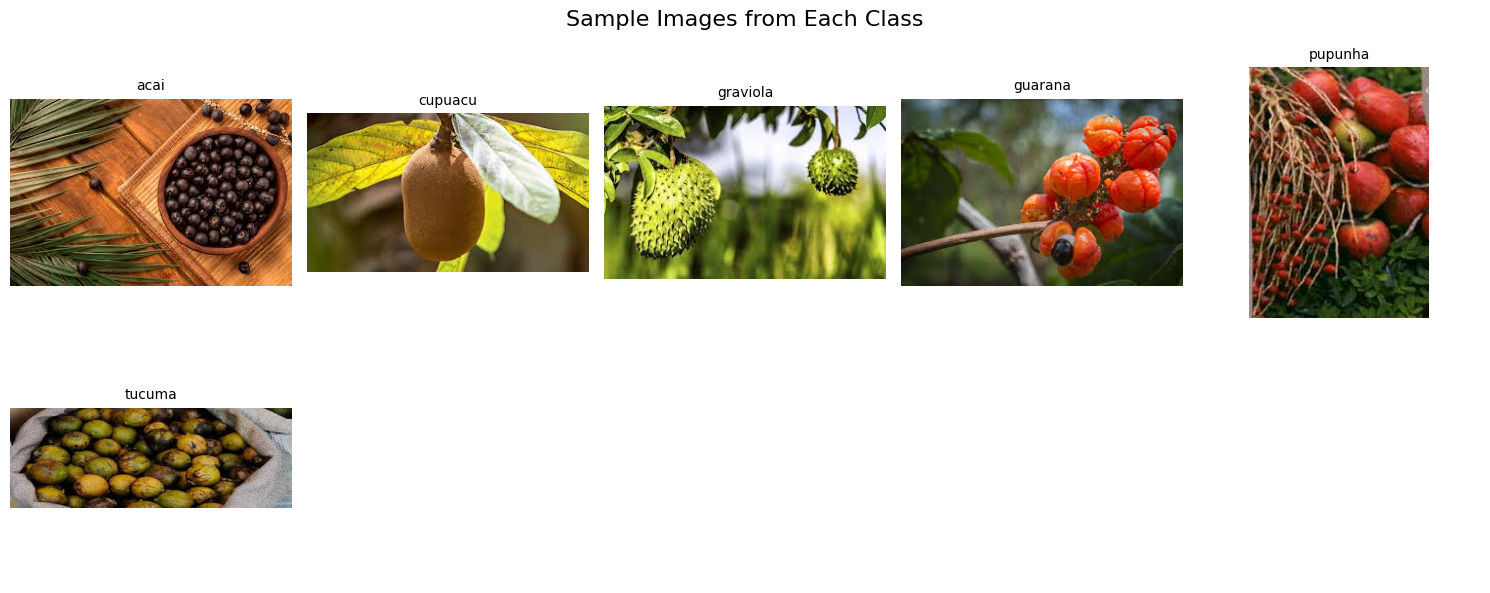

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Pralhad_Gurung.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.1858 - loss: 2.0580
Epoch 1: val_loss improved from inf to 1.75717, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 717ms/step - accuracy: 0.1810 - loss: 2.0837 - val_accuracy: 0.0000e+00 - val_loss: 1.7572
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.2037 - loss: 1.7428
Epoch 2: val_loss improved from 1.75717 to 1.64763, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 554ms/step - accuracy: 0.2118 - loss: 1.7413 - val_accuracy: 0.5000 - val_loss: 1.6476
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.2679 - loss: 1.5701
Epoch 3: val_loss did not improve from 1.64763
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step - accuracy: 0.2808 - loss: 1.5614 - val_accuracy: 0.0000e+00 - val_loss: 2.7540
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.2477 - loss: 1.9012
Epoch 4: val_loss improved from 1.64763 to 1.42700, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - accuracy: 0.2622 - loss: 1.8709 - val_accuracy: 0.3889 - val_loss: 1.4270
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3571 - loss: 1.4440
Epoch 5: val_loss improved from 1.42700 to 1.12436, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.3754 - loss: 1.4287 - val_accuracy: 0.7222 - val_loss: 1.1244
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5793 - loss: 1.0904
Epoch 6: val_loss did not improve from 1.12436
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - accuracy: 0.5838 - loss: 1.0901 - val_accuracy: 0.7222 - val_loss: 1.2943
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.7853 - loss: 0.8974
Epoch 7: val_loss did not improve from 1.12436
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.7834 - loss: 0.8987 - val_accuracy: 0.5000 - val_loss: 1.5083
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7650 - loss: 0.8833
Epoch 8: val_loss improved from 1.12436 to 0.94228, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.7648 - loss: 0.8718 - val_accuracy: 0.8333 - val_loss: 0.9423
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.8009 - loss: 0.6000
Epoch 9: val_loss improved from 0.94228 to 0.60452, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - accuracy: 0.7951 - loss: 0.6028 - val_accuracy: 0.8333 - val_loss: 0.6045
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.9502 - loss: 0.4112
Epoch 10: val_loss did not improve from 0.60452
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.9488 - loss: 0.4078 - val_accuracy: 0.5000 - val_loss: 1.1894
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.9091 - loss: 0.3096
Epoch 11: val_loss improved from 0.60452 to 0.53472, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 648ms/step - accuracy: 0.9145 - loss: 0.2994 - val_accuracy: 0.8333 - val_loss: 0.5347
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9902 - loss: 0.1775
Epoch 12: val_loss improved from 0.53472 to 0.51062, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.9891 - loss: 0.1755 - val_accuracy: 0.8333 - val_loss: 0.5106
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9797 - loss: 0.1424
Epoch 13: val_loss did not improve from 0.51062
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.9813 - loss: 0.1388 - val_accuracy: 0.7222 - val_loss: 0.6891
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9797 - loss: 0.0878
Epoch 14: val_loss did not improve from 0.51062
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.9813 - loss: 0.0863 - val_accuracy: 0.7222 - val_loss: 0.7273
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9797 - loss: 0.0611
Epoch 15: val_loss improved from 0.51062 to 0.35552, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.9813 - loss: 0.0590 - val_accuracy: 0.8333 - val_loss: 0.3555
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 1.0000 - loss: 0.0395
Epoch 16: val_loss improved from 0.35552 to 0.34623, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 406ms/step - accuracy: 1.0000 - loss: 0.0379 - val_accuracy: 0.8333 - val_loss: 0.3462
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 1.0000 - loss: 0.0182
Epoch 17: val_loss improved from 0.34623 to 0.34357, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.8333 - val_loss: 0.3436
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0108
Epoch 18: val_loss improved from 0.34357 to 0.32362, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 502ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.8333 - val_loss: 0.3236
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 1.0000 - loss: 0.0082
Epoch 19: val_loss improved from 0.32362 to 0.31427, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.8333 - val_loss: 0.3143
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 20: val_loss improved from 0.31427 to 0.30993, saving model to Pralhad_Gurung.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 594ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8333 - val_loss: 0.3099
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 21: val_loss did not improve from 0.30993
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8333 - val_loss: 0.3206
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 1.0000 - loss: 0.0031
Epoch 22: val_loss did not improve from 0.30993
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8333 - val_loss: 0.3461
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 23: val_loss did not improve from 0.30993
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8333 - val_loss: 0.3694
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 24: val_loss did not improve from 0.30993
3/3 

In [8]:
test_dir = '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 327.1286
Test Loss: 327.1285705566406
Test Accuracy: 0.699999988079071


In [9]:

model.save('Pralhad_Gurung_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.36      0.80      0.50         5
           2       0.71      1.00      0.83         5
           3       1.00      0.60      0.75         5
           4       1.00      0.80      0.89         5
           5       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.85      0.70      0.72        30
weighted avg       0.85      0.70      0.72        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 1: val_loss did not improve from 0.30993
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.8333 - val_loss: 0.3182
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 1.0000 - loss: 0.0041
Epoch 2: val_loss did not improve from 0.30993
3/3 ━━━━━━━━━━━━

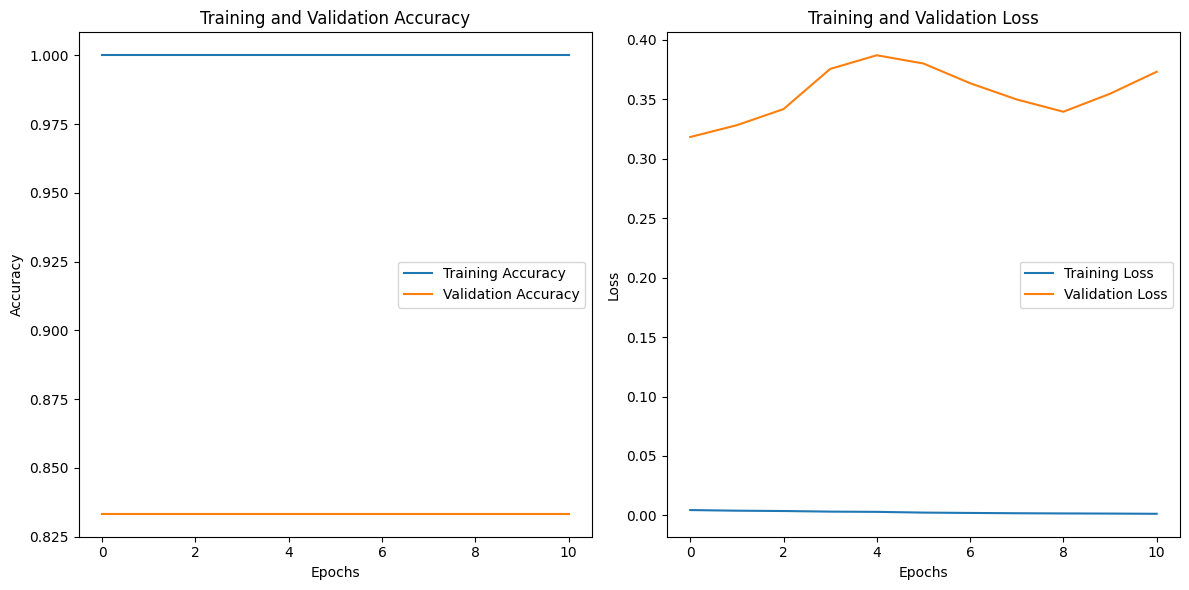

Model saved as 'shreejal_khatri_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Pralhad_Gurung_model.h5')
print("Model saved as 'Pralhad_Gurung_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 577ms/step - accuracy: 0.2059 - loss: 2.7242 - val_accuracy: 0.3333 - val_loss: 1.6843
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step - accuracy: 0.4471 - loss: 1.5056 - val_accuracy: 0.2667 - val_loss: 1.6250
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - accuracy: 0.5615 - loss: 1.3713 - val_accuracy: 0.3667 - val_loss: 1.6239
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step - accuracy: 0.5686 - loss: 1.3695 - val_accuracy: 0.2889 - val_loss: 1.6460
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.5016 - loss: 1.4273 - val_accuracy: 0.2556 - val_loss: 1.6824
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - accuracy: 0.5372 - loss: 1.2735 - val_accuracy: 0.1778 - val_loss: 1.7474
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - accuracy: 0.5816 - loss: 1.1478 - val_accuracy: 0.1667 - val_loss: 1.8260
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 689ms/step - accuracy: 0.6801 - loss: 1.1386 - val_accuracy: 0.1778 - val_loss:

## Task 2: Transfer Learning using VGG16

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/AIandML/FruitinAmazon/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 30s/step - accuracy: 0.2162 - loss: 1.8439 - val_accuracy: 0.4333 - val_loss: 1.5760
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 77s 33s/step - accuracy: 0.3478 - loss: 1.5930 - val_accuracy: 0.5000 - val_loss: 1.4171
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 31s/step - accuracy: 0.5798 - loss: 1.4492 - val_accuracy: 0.7222 - val_loss: 1.1982
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 31s/step - accuracy: 0.7011 - loss: 1.2255 - val_accuracy: 0.7444 - val_loss: 1.0709
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 29s/step - accuracy: 0.7354 - loss: 1.1395 - val_accuracy: 0.7556 - val_loss: 0.9722


In [15]:
#Report
import numpy as np
from sklearn.metrics import classification_report


Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 11s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.54      0.47      0.50        15
     cupuacu       0.10      0.13      0.11        15
    graviola       0.17      0.20      0.18        15
     guarana       0.20      0.20      0.20        15
     pupunha       0.67      0.13      0.22        15
      tucuma       0.15      0.20      0.17        15

    accuracy                           0.22        90
   macro avg       0.30      0.22      0.23        90
weighted avg       0.30      0.22      0.23        90

